导入库

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation

import matplotlib.pyplot as plt

生成数据集

In [ ]:
X1=np.random.uniform(0,100,size=(500,3)).astype(np.float32)
np.random.shuffle(X1) 
w0=np.array([[1.],[2.],[3.]]).astype(np.float32)
b0=np.array([[10.]]).astype(np.float32)
Y1=np.matmul(X1,w0)+b0+np.random.normal(size=(500,1))*0.2
m_m=X1.max()-X1.min()
X1 /= m_m
Y1 /= m_m

In [ ]:
X1.shape,Y1.shape

((500, 3), (500, 1))

In [ ]:
X1_train, Y1_train = X1[:400,:], Y1[:400]     # 前400组数据为训练数据集
X1_test, Y1_test = X1[400:,:], Y1[400:]      #后100组数据为测试数据集

In [ ]:
partial_X1= X1_train[300:,:]
partial_Y1= Y1_train[300:]

partial_X1_val= X1_train[:300,:]
partial_Y1_val= Y1_train[:300]

In [ ]:
partial_X1_val.shape,Y1_train.shape

((300, 3), (400, 1))

构建模型

In [ ]:
model=Sequential()
# 全连接层
# model.add(Dense(units=1,input_dim=36))
# model.add(Dense(64,activation='relu', input_shape=(X1_train.shape[1],)))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(1))
model.add(Dense(1,input_shape=(X1_train.shape[1],)))

选定loss函数和优化器

In [ ]:
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

训练模型

In [ ]:
test=model.fit(partial_X1,partial_Y1, epochs=100, batch_size = 300, validation_data=(partial_X1_val,partial_Y1_val))

Epoch 1/100
1/1 [==============================] - 0s 71ms/step - loss: 4.2923 - mae: 1.9225 - val_loss: 3.9539 - val_mae: 1.8753
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 4.0087 - mae: 1.8519 - val_loss: 3.6862 - val_mae: 1.8057
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 3.7449 - mae: 1.7839 - val_loss: 3.4374 - val_mae: 1.7386
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 3.4995 - mae: 1.7182 - val_loss: 3.2062 - val_mae: 1.6739
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 3.2712 - mae: 1.6549 - val_loss: 2.9913 - val_mae: 1.6115
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 3.0589 - mae: 1.5940 - val_loss: 2.7916 - val_mae: 1.5514
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 2.8614 - mae: 1.5358 - val_loss: 2.6059 - val_mae: 1.4934
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 2.6777 - mae: 1.48

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


模型评估

In [ ]:
model.evaluate(X1_test,Y1_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1854 - mae: 0.3546


[0.18537336587905884, 0.3546347916126251]

In [ ]:
print(model(X1_test[:5]))
print(Y1_test[:5])

tf.Tensor(
[[4.695365 ]
 [4.0556164]
 [3.96361  ]
 [4.1801157]
 [1.7333758]], shape=(5, 1), dtype=float32)
[[5.34106438]
 [4.37538372]
 [4.00817974]
 [4.27029392]
 [1.27601539]]


In [ ]:
history_dict = test.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

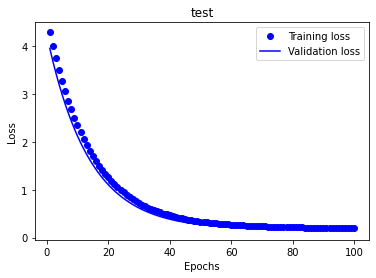

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

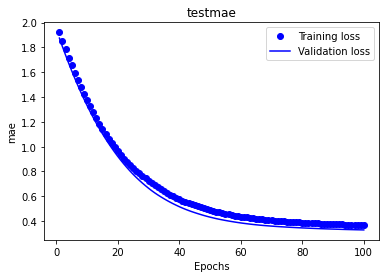

In [ ]:
plt.clf()
mae = history_dict['mae']
val_mae = history_dict['val_mae']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('testmae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [ ]:
print('\nTesting ------------')
cost = model.evaluate(X1_test, Y1_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
3/3 [==============================] - 0s 2ms/step - loss: 0.1854 - mae: 0.3546
test cost: [0.18537336587905884, 0.3546347916126251]
Weights= [[1.2484834]
 [1.4201232]
 [1.6882144]] 
biases= [0.96951365]
